# Decision Tree Classifier

In [1]:
#Importando Dependências
import numpy as np
import pandas as pd

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [5]:
#Desabilitando warning
pd.set_option('mode.chained_assignment',None)

### Carregando os dados

In [6]:
#Lendo os dados
matriculas = pd.read_csv("data/out.csv")

In [7]:
matriculas.shape

(110713, 31)

In [8]:
y = matriculas[['categoria_situacao']]

In [9]:
x = matriculas[[
    'idade',
    'mes_ocorrencia',
    'data_matricula',
    'carga_horaria',
    'fim_ciclo',
    'renda_familiar',
    'faixa_etaria',
    'total_inscritos',
    'inicio_ciclo',
    'cor_raca',
    'vagas_ofertadas',
    'codigo_municipio_dv',
    'codigo_unidade_ensino_sistec',
    'municipio',
    'unidade_ensino'
    
]]

### Nomes dos campos

In [10]:
nomes = list(x.columns.values)

### Convertendo variáveis categóricas em numéricas

In [11]:
le = LabelEncoder()
for n in nomes: 
    x[n] = le.fit_transform(x[n])

In [12]:
y['categoria_situacao'] = le.fit_transform(y['categoria_situacao'])

### Dimensionando campos com MinMaxScaler

In [13]:
min_max_scaler = MinMaxScaler()
for n in nomes:
    x[[n]] = min_max_scaler.fit_transform(x[[n]])

In [14]:
x

,idade,mes_ocorrencia,data_matricula,carga_horaria,fim_ciclo,renda_familiar,faixa_etaria,total_inscritos,inicio_ciclo,cor_raca,vagas_ofertadas,codigo_municipio_dv,codigo_unidade_ensino_sistec,municipio,unidade_ensino
0,0.215385,0.029499,0.307692,0.160779,0.775136,0.833333,0.2,0.903226,0.919473,1.0,0.191257,0.224176,0.395112,0.827051,0.791837
1,0.246154,0.023599,0.192308,0.053353,0.451213,0.166667,0.2,0.018174,0.549780,1.0,0.218579,0.417582,0.221996,0.946785,0.910204
2,0.200000,0.023599,0.192308,0.053353,0.451213,0.166667,0.2,0.018174,0.549780,1.0,0.218579,0.417582,0.221996,0.946785,0.910204
3,0.538462,0.064897,0.224852,0.649603,0.956909,0.333333,0.6,0.019537,0.963397,1.0,0.273224,0.076923,0.617108,0.518847,0.502041
4,0.430769,0.064897,0.224852,0.649603,0.956909,0.333333,0.5,0.019537,0.963397,1.0,0.273224,0.076923,0.617108,0.518847,0.502041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110708,0.092308,0.056047,0.165680,0.660418,0.990589,0.000000,0.0,0.226261,0.729868,0.8,0.191257,0.184615,0.757637,0.172949,0.189796
110709,0.107692,0.038348,0.165680,0.660418,0.990589,0.833333,0.0,0.226261,0.729868,0.8,0.191257,0.184615,0.757637,0.172949,0.189796
110710,0.138462,0.020649,0.165680,0.196828,0.942051,0.833333,0.1,0.081781,0.729868,0.8,0.224044,0.230769,0.763747,0.924612,0.889796
110711,0.123077,0.044248,0.165680,0.196828,0.942051,0.333333,0.1,0.081781,0.729868,0.8,0.224044,0.230769,0.763747,0.924612,0.889796


### Treinamento

In [15]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.20, random_state=42)
arvore = DecisionTreeClassifier(random_state=42)
arvore.fit(x_treino, y_treino.values.ravel())
#Realizando a predição
resultado = arvore.predict(x_teste)

### Métricas

In [16]:
# Imports
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

metricas = ['accuracy','precision','recall','roc_auc','f1']

In [17]:
#Holdout
metrica_holdout = {}
metrica_holdout['accuracy'] = accuracy_score(y_teste,resultado)
metrica_holdout['precision'] = precision_score(y_teste,resultado)
metrica_holdout['recall'] = recall_score(y_teste,resultado)
metrica_holdout['roc_auc'] = roc_auc_score(y_teste,resultado)
metrica_holdout['f1'] = f1_score(y_teste,resultado)

for metrica in metricas:    
    print('holdout ' + metrica+ ': ', np.mean(metrica_holdout[metrica]))

holdout accuracy:  0.850697737433952
holdout precision:  0.8928430469675043
holdout recall:  0.8900327868852459
holdout roc_auc:  0.8268530393152473
holdout f1:  0.8914357020885328


In [18]:
#Cros validation
from sklearn.model_selection import cross_val_score
metrica_cross = {}

for metrica in metricas:
    metrica_cross[metrica] = cross_val_score(arvore, x, y.values.ravel(), cv=10, n_jobs=-1, scoring=metrica)
    print('cross ' + metrica+ ': ', np.mean(metrica_cross[metrica]))


cross accuracy:  0.7365611700725168
cross precision:  0.8013820783544325
cross recall:  0.82430133757153
cross roc_auc:  0.6823386961630779
cross f1:  0.8109015569016051


In [19]:
mean_squared_error(y_teste,resultado)

0.14930226256604795

In [20]:
arvore.score(x_teste,y_teste)

0.850697737433952

In [21]:
#F1 Score
score = f1_score(y_teste, resultado,average='weighted')
print(score)

0.8508390864511143


In [22]:
#MCC
matthews_corrcoef(y_teste, resultado)

0.6524694744241694

### Matriz de confusão

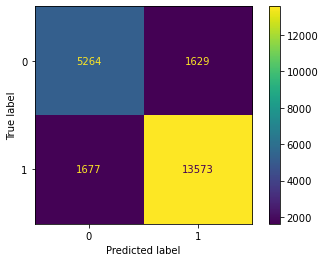

In [23]:
ConfusionMatrixDisplay.from_predictions(y_teste, resultado)
plt.show()

In [24]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

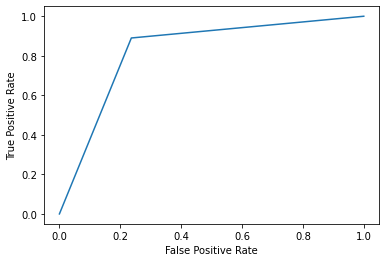

In [25]:
fpr, tpr, _ = roc_curve(y_teste, resultado)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [26]:
roc_auc_score(y_teste, resultado)

0.8268530393152473